<a href="https://colab.research.google.com/github/khalishekahmad/Hands-On-AI-Master-Basic-Class/blob/main/Daffa_Asyqar_Hands_On_AI_Master_Basic_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Master: Basic Class
## Hands-On
Dibuat dan dipaparkan oleh:

<img src="https://ailo.telkomuniversity.ac.id/wp-content/uploads/2023/07/cropped-logo-stempel-ai-center-1.png" width="250px"/>

© 2023 AI for Learning & Optimization Telkom University

[Instagram](https://www.instagram.com/aicenter.telu)
<br/>

### IMPORT DEPENDENCIES

Pada langkah ini melakukan import (sekaligus install jika tidak menggunakan Google Colab) pada library-library yang dibutuhkan. Kebutuhannya ada Tensorflow (framework) dan matplotlib (plotting grafik dan gambar).

In [2]:
# DO NOT CHANGE THIS CODE

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### DATA PREPROCESSING

Pada langkah ini dilakukan pengambilan data dari koleksi dataset Tensorflow. Dataset yang digunakan adalah [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html). Cifar10 adalah dataset berisi 50.000 32x32 color training images and 10.000 test images, dengan 10 kategori berbeda. Setelah dataset di load, data akan dicek spesifikasinya sebelum diberikan ke model.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # DO NOT CHANGE THIS CODE

# Normalisasi nilai pixel sehingga berada pada range 0 sampai 1
# HINT: Nilai awal setiap pixel memiliki rentang 0-255

train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


#### Menampilkan isi dari dataset

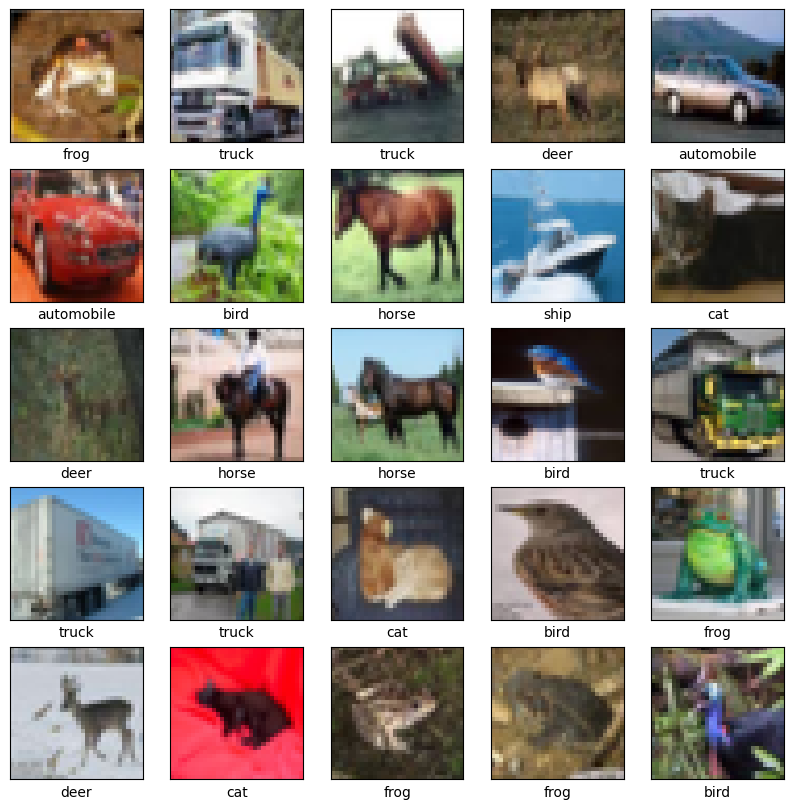

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
#Mencetak Ukuran array Set Pelatihan
print("Ukuran data Gambar Latih:"+str(train_images.shape))
#Menceetak Ukuran array Label
print("Ukuran data Label Latih:"+str(train_labels.shape))

#Cetak Ukuran array Set Uji
print("Ukuran data Gambar Uji :"+str(test_images.shape))
#Cetak Ukuran array Label
print("Ukuran data Label Uji :"+str(test_labels.shape))

#Mencetak output
print("Kumpulan Label Latih :"+str(train_labels))
print("Kumpulan Label Uji  :"+str( test_labels))

Ukuran data Gambar Latih:(50000, 32, 32, 3)
Ukuran data Label Latih:(50000, 1)
Ukuran data Gambar Uji :(10000, 32, 32, 3)
Ukuran data Label Uji :(10000, 1)
Kumpulan Label Latih :[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Kumpulan Label Uji  :[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


### DESIGNING NODEL

Langkah ini adalah proses untuk menentukan susunan layer pada model deep learning. Model harus berisi satu `Flatten Layer` sebagai `input layer` dan satu `output layer` dengan jumlah neuron sesuai dengan total jumlah kelas pada dataset. Pada input layer, nilai dari `input_shape` harus disesuaikan dengan ukuran gambar pada dataset. Jangan lupa gunakan `activation function` pada `output layer` dan `hidden layer`.

**Note: Model boleh ditambahkan dengan layer lain seperti `convolutional layer` pada CNN.**

In [9]:
model_image = tf.keras.Sequential([
     # Lapisan input (contoh: Conv2D)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Lapisan lainnya (contoh: MaxPooling2D dan Flatten)
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    # Lapisan-lapisan tersembunyi (contoh: Dense)
    tf.keras.layers.Dense(128, activation='relu'),
    # Lapisan output (contoh: Dense dengan jumlah kelas yang sesuai)
    tf.keras.layers.Dense(10)
])

Baris code di bawah adalah proses compile model yang telah dibuat. Pada proses ini akan ditentukan jenis `optimizer`, `loss`, dan `metrics` yang akan digunakan selama proses pelatihan.

In [12]:
model_image.compile(optimizer='adam',  # Contoh penggunaan Adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Contoh penggunaan fungsi kerugian cross-entropy
              metrics=['accuracy'])


Setelah model berhasil di-compile. Selanjutnya model yang telah siap akan dilatih dengan data yang pada langkah awal sudah disediakan. Pelatihan membutuhkan setidaknya informasi `gambar latih`, `label latih`, dan `jumlah perulangan (epoch)`

In [13]:
history = model_image.fit(
    train_images,  # Data gambar pelatihan
    train_labels,  # Label pelatihan
    epochs=10,  # Jumlah epoch (sumber dari pengulangan pelatihan)
    validation_data=(test_images, test_labels)  # Data validasi
)


Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4467 - accuracy: 0.4849 - val_loss: 1.2815 - val_accuracy: 0.5369
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1769 - accuracy: 0.5861 - val_loss: 1.1987 - val_accuracy: 0.5762
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0654 - accuracy: 0.6280 - val_loss: 1.1789 - val_accuracy: 0.5806
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9915 - accuracy: 0.6522 - val_loss: 1.0959 - val_accuracy: 0.6149
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9166 - accuracy: 0.6793 - val_loss: 1.1184 - val_accuracy: 0.6132
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8605 - accuracy: 0.6974 - val_loss: 1.1365 - val_accuracy: 0.6129
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8040 - accuracy: 0.7182 - val_loss: 1.1225 -

### PERFORMANCE EVALUATION

Proses ini akan melihat sekaligus dapat digunakan sebagai evaluasi terkait performa model yang telah dibuat pada dataset cifar10. Proses ini akan melihat nilai `accuracy` dan `loss` model seiring berjalannya pelatihan.

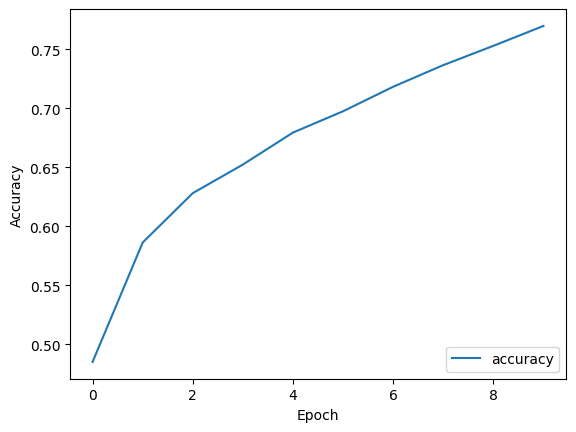

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

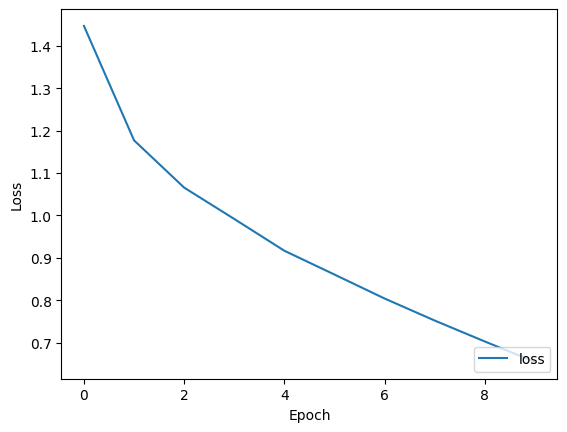

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Hasil yang didapatkan mungkin kurang memuaskan jika hanya menggunakan neural network. Oleh karena itu, dalam tugas klasifikasi gambar banyak model yang memanfaatkan `convolutional layer` sebagai tambahan ke dalam modelnya. Convolutional layer berguna untuk melakukan `ekstraksi ciri` pada gambar sebelum akhirnya diklasifikasikan oleh neural network.